# S&P 500 Analysis

This notebook shows a simple analysis of the Standard and Poor's 500. This stock market index tracks the performance of 500 large companies listed on stock exchanges in the United States. As of December 31, 2020, more than $5.4 trillion was invested in assets tied to the performance of this index.

The objectives ot the analysis are:
1. Show the composition of the index by sector.
2. Determine the percentage of each sector in the total market capitalization.
3. Show the total number of full-time employees by sector.
4. Show the number of companies by state.

Data source: [Kaggle](https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks?select=sp500_companies.csv)

## Preparing the tools

Pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
# Import all the tools

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default="svg"

%matplotlib inline 

## Import data

As mentioned above, the dataset was retrieved from Kaggle (https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks?select=sp500_companies.csv) and downloaded in csv format and then imported into the project.

In [2]:
df = pd.read_csv("sp500_companies.csv")
df

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,132.30,2104641716224,1.305410e+11,0.081,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.061909
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software—Infrastructure,241.80,1815429513216,9.798300e+10,0.124,Redmond,WA,United States,221000.0,"Microsoft Corporation develops, licenses, and ...",0.053402
2,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,89.02,1156538826752,9.373300e+10,0.061,Mountain View,CA,United States,186779.0,Alphabet Inc. provides various products and pl...,0.034020
3,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,89.63,1155187212288,9.373300e+10,0.061,Mountain View,CA,United States,186779.0,Alphabet Inc. provides various products and pl...,0.033980
4,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,85.19,869082857472,5.154900e+10,0.147,Seattle,WA,United States,1544000.0,"Amazon.com, Inc. engages in the retail sale of...",0.025564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,NYQ,ALK,"Alaska Air Group, Inc.","Alaska Air Group, Inc.",Industrials,Airlines,43.07,5462912512,1.092000e+09,0.448,Seattle,WA,United States,22354.0,"Alaska Air Group, Inc., through its subsidiari...",0.000161
490,NYQ,LUMN,"Lumen Technologies, Inc.","Lumen Technologies, Inc.",Communication Services,Telecom Services,5.28,5406139392,7.419000e+09,-0.063,Monroe,LA,United States,35000.0,"Lumen Technologies, Inc., a facilities-based t...",0.000159
491,NMS,NWL,Newell Brands Inc.,Newell Brands Inc.,Consumer Defensive,Household & Personal Products,12.61,5364293632,1.390000e+09,-0.065,Atlanta,GA,United States,32000.0,"Newell Brands Inc. designs, manufactures, sour...",0.000158
492,NYQ,LNC,Lincoln National Corporation,Lincoln National Corporation,Financial Services,Insurance—Life,29.24,5283931136,1.422000e+09,0.052,Radnor,PA,United States,10848.0,"Lincoln National Corporation, through its subs...",0.000155


In [3]:
# Check the information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             494 non-null    object 
 1   Symbol               494 non-null    object 
 2   Shortname            494 non-null    object 
 3   Longname             494 non-null    object 
 4   Sector               494 non-null    object 
 5   Industry             494 non-null    object 
 6   Currentprice         494 non-null    float64
 7   Marketcap            494 non-null    int64  
 8   Ebitda               451 non-null    float64
 9   Revenuegrowth        481 non-null    float64
 10  City                 494 non-null    object 
 11  State                474 non-null    object 
 12  Country              494 non-null    object 
 13  Fulltimeemployees    490 non-null    float64
 14  Longbusinesssummary  494 non-null    object 
 15  Weight               494 non-null    flo

In [4]:
# Check the shape (number of rows and columns) of the DataFrame
df.shape

(494, 16)

In [5]:
# Check the unique values in Sector column
all_sectors = df.Sector.unique()
all_sectors

array(['Technology', 'Communication Services', 'Consumer Cyclical',
       'Financial Services', 'Healthcare', 'Energy', 'Consumer Defensive',
       'Basic Materials', 'Utilities', 'Industrials', 'Real Estate'],
      dtype=object)

In [6]:
# Check how many companies are included in every sector
companies_per_sector = df.Sector.value_counts().to_frame().reset_index()
companies_per_sector.columns = ["Sector", "Nº of companyes per sector"]
companies_per_sector

,Sector,Nº of companyes per sector
0,Technology,71
1,Industrials,71
2,Financial Services,68
3,Healthcare,64
4,Consumer Cyclical,57
5,Consumer Defensive,36
6,Real Estate,32
7,Utilities,29
8,Energy,23
9,Communication Services,22


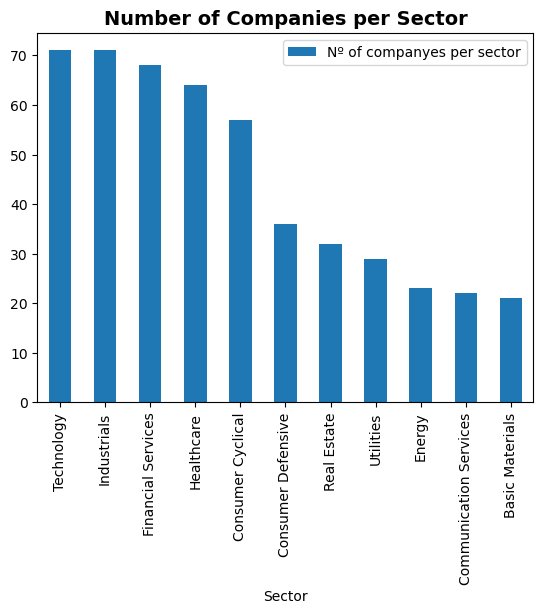

In [7]:
# Creation of a bar plot to show how many companies are included in every sector
companies_per_sector.plot(x="Sector", 
                          y="Nº of companyes per sector", 
                          kind="bar")
plt.title("Number of Companies per Sector",
          fontsize = 14, 
          fontweight = "bold");

### Bar Graph Insight 

As can be seen in the bar chart, the majority of companies belong to the Technology (71) and Industrial (71) sectors, closely followed by Financial Services (68) and Healthcare (64), with the Consumer Cyclical sector (57) being the last with more than 55 companies.
These five sectors account for 67% of the total number of companies in the index, marking a considerable difference with the six sectors at the right side of the chart, none of which exceeds forty companies per sector.

In [8]:
# Check de total Marketcap 
df.Marketcap.sum()

33995846172160

In [9]:
# Creation of a dict with each sector and a loop to calculate the percentage of marketcap per sector.
marketcap_sector = dict.fromkeys(all_sectors)

for sector in all_sectors:
    percentage_sector = df.loc[df["Sector"] == sector].Marketcap.sum()*100/df.Marketcap.sum()
    marketcap_sector[sector] = percentage_sector


marketcap_sector

{'Technology': 22.765219550480957,
 'Communication Services': 10.287198669959732,
 'Consumer Cyclical': 8.825340212702146,
 'Financial Services': 12.825939358728895,
 'Healthcare': 15.007797487971253,
 'Energy': 5.061548716669789,
 'Consumer Defensive': 8.340429089769136,
 'Basic Materials': 2.4030609603976036,
 'Utilities': 2.9075609461766097,
 'Industrials': 9.023645835179073,
 'Real Estate': 2.552259171964806}

In [10]:
# Transform that information into a dataframe
percentage_marketcap_sector = pd.DataFrame.from_dict(marketcap_sector, orient="index", columns=["% Of Marketcap"]).reset_index()
percentage_marketcap_sector.columns = ["Sector", "% Of Marketcap"]
percentage_marketcap_sector

,Sector,% Of Marketcap
0,Technology,22.765220
1,Communication Services,10.287199
2,Consumer Cyclical,8.825340
3,Financial Services,12.825939
4,Healthcare,15.007797
5,Energy,5.061549
6,Consumer Defensive,8.340429
7,Basic Materials,2.403061
8,Utilities,2.907561
9,Industrials,9.023646


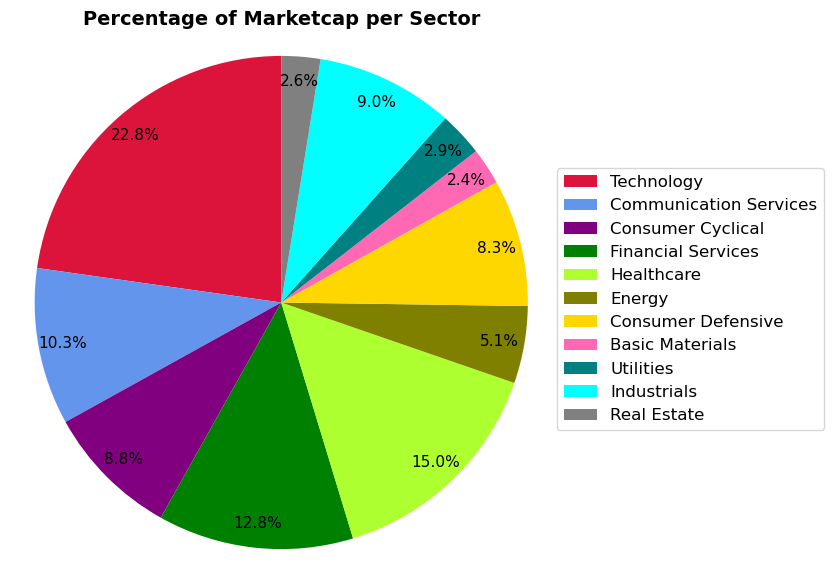

In [11]:
# Plot the information into a pie chart
plt.style.use("default")
colors1 = ["crimson", "cornflowerblue", "purple", "green", "greenyellow", "olive", "gold", "hotpink", "teal", "aqua", "grey"]
fig, ax = plt.subplots(figsize=(7, 7))

ax.pie(x=percentage_marketcap_sector["% Of Marketcap"], 
       labels=None, 
       autopct="%1.1f%%", 
       textprops={"fontsize": 11},
       shadow=False, 
       startangle=90, 
       pctdistance=0.9,
       colors=colors1)

ax.axis("equal") 

ax.legend(labels=percentage_marketcap_sector["Sector"], 
          bbox_to_anchor=(1.3,0.5), 
          loc="center right", 
          fontsize=12, 
          bbox_transform=plt.gcf().transFigure)

ax.set_title("Percentage of Marketcap per Sector", weight="bold", size=14)

plt.show()

### Pie Chart Insight

As the pie chart shows, the largest share of market capitalization is in companies belonging to the Technology sector (22.8%) presenting a significant difference with the second largest, the Healthcare sector (15%), followed by Financial Services (12.8%), Communication Services (10.3%) and Industrials (9.0%).
These five sectors represent 69.9% of the total market cap.

#### Other notable aspects are:
* The Healthcare sector is second in market capitalization, but fourth in the number of companies per sector.
* The Industrial sector is fifth in market capitalization but second regarding the number of companies per sector.
* The Consumer Cyclical sector is sixth in respect of market capitalization, but fifth in the number of companies per sector.

Most notably, however, the Communication Services sector, comprising only twenty-two companies and in ninth place in terms of companies per sector, ranks fourth on market capitalization.

In [12]:
# Creation of a dict with each sector and a loop to calculate the total number of full-time employees per sector.
emp_sector = dict.fromkeys(all_sectors)

for employee in all_sectors:
    employees_sector = df.loc[df["Sector"] == employee].Fulltimeemployees.sum()
    emp_sector[employee] = employees_sector


emp_sector

{'Technology': 3681134.0,
 'Communication Services': 1476137.0,
 'Consumer Cyclical': 5440705.0,
 'Financial Services': 2835094.0,
 'Healthcare': 3210371.0,
 'Energy': 389916.0,
 'Consumer Defensive': 5103812.0,
 'Basic Materials': 517455.0,
 'Utilities': 358437.0,
 'Industrials': 4124552.0,
 'Real Estate': 207138.0}

In [13]:
# Transform that information into a dataframe
emp_per_sector = pd.DataFrame.from_dict(emp_sector, orient="index", columns=["Fulltime Per Sector"]).reset_index()
emp_per_sector.columns = ["Sector", "Full-time Per Sector"]
emp_per_sector = emp_per_sector.sort_values("Full-time Per Sector", ascending=False)
emp_per_sector

,Sector,Full-time Per Sector
2,Consumer Cyclical,5440705.0
6,Consumer Defensive,5103812.0
9,Industrials,4124552.0
0,Technology,3681134.0
4,Healthcare,3210371.0
3,Financial Services,2835094.0
1,Communication Services,1476137.0
7,Basic Materials,517455.0
5,Energy,389916.0
8,Utilities,358437.0


In [14]:
# The total amount of full-time employees
emp_per_sector["Full-time Per Sector"].sum()

27344751.0

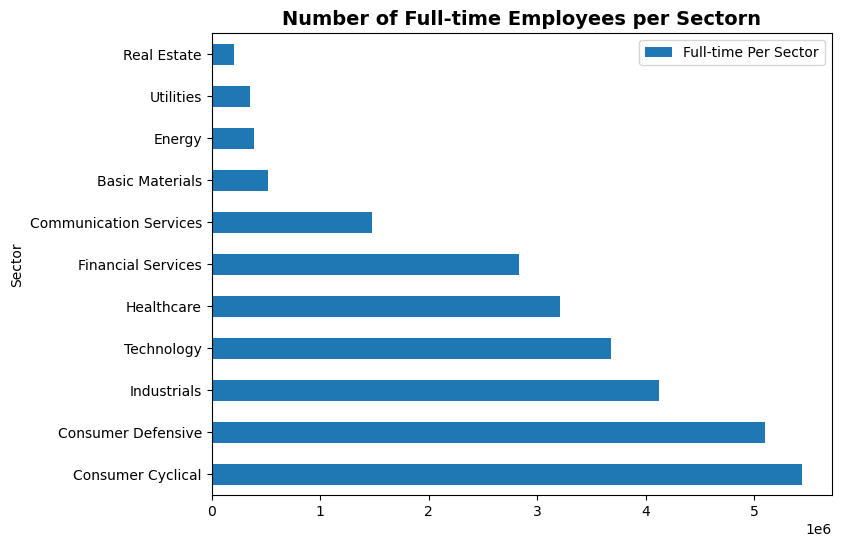

In [15]:
# Creation of a bar plot to show the number of full-time employees per sector.
emp_per_sector.plot(x="Sector", 
                    y="Full-time Per Sector", 
                    kind="barh", 
                    figsize=(8, 6))
plt.title("Number of Full-time Employees per Sectorn",
          fontsize = 14, 
          fontweight = "bold");

###  Bar Plot Insight

As the bar chart shows, the sector with the most full-time employees is Consumer Cyclical with approximately 5.4 million, followed by Consumer Defensive (5.1 million), Industrial (4.1 million), Technology (3.6 million), and Healthcare (3.2 million) in fifth place.

#### Other notable points to note are:

* Consumer Cyclical is first in terms of full-time employees, but fifth in the number of companies per sector and sixth in market capitalization.
* Consumer Defensive is second in respect of full-time employees but sixth by the number of companies per sector and seventh in market capitalization.
* Industrial is third regarding full-time employees, although second in the number of companies per sector and fifth in market capitalization.
* Technology is fourth in the matter of full-time employees, but first in both: the number of companies per sector and market capitalization.
* Healthcare is fifth in full-time employees, yet fourth in the number of companies per sector and second in terms of market capitalization.

These five sectors account for 78.85% of the total number of full-time employees in the index.

In [16]:
# Creation of a new dataframe including the name of the companies and their current state..
companies_state = df[["Shortname", "State"]].copy()
companies_state.rename({"Shortname": "Companies"}, axis=1, inplace=True)
companies_state

,Companies,State
0,Apple Inc.,CA
1,Microsoft Corporation,WA
2,Alphabet Inc.,CA
3,Alphabet Inc.,CA
4,"Amazon.com, Inc.",WA
...,...,...
489,"Alaska Air Group, Inc.",WA
490,"Lumen Technologies, Inc.",LA
491,Newell Brands Inc.,GA
492,Lincoln National Corporation,PA


In [17]:
# Calculation of companies by state
companies_state_total = companies_state.groupby(["State"], as_index=False)["Companies"].count()
companies_state_total["State"] = companies_state_total["State"].astype("str") 
companies_state_total = companies_state_total.sort_values("Companies", ascending=False)
companies_state_total

,State,Companies
3,CA,66
26,NY,52
33,TX,47
12,IL,31
16,MA,23
27,OH,21
30,PA,20
9,GA,18
22,NC,16
8,FL,16


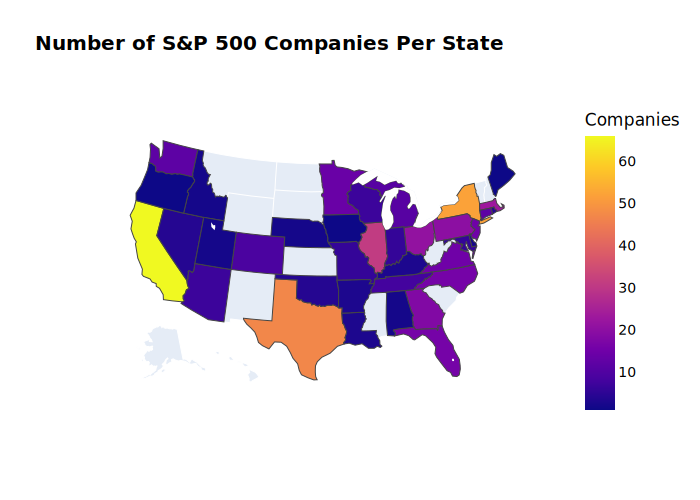

In [18]:
# Creation of a heat map showing the number of companies per state.
fig = px.choropleth(companies_state_total, 
                    locations="State", 
                    locationmode="USA-states", 
                    color="Companies", 
                    scope="usa", 
                    title="Number of S&P 500 Companies Per State")

fig.update_layout(title="<b>Number of S&P 500 Companies Per State</b>",
                  font=dict(size=14, color="black"))
fig.show()

###  Heat Map Insight

The states with the highest number of companies are California (66), New York (52), and Texas (47). In fourth place, but separated by a wide gap, is Illinois (31).
These top four states account for approximately 40% of the total number of companies in the index.
None of the other states has more than 30 companies, with Maine, Oregon, and Iowa in last place with only one company each.